# <span style="color:darkblue"> Laboratorio di Simulazione Numerica </span>
#### <span style="color:darkred">  Andrea Sala - Settembre 2020</span>
# <span style="color:darkgreen">  Esercitazione 9</span>

Il codice che ho scritto simula il problema del commesso viaggiatore risolvendolo con un algoritmo geentico. Il problema consiste nel trovare il percorso di minima lunghezza tra un set di $N=32$ città poste in modo casuale su una circonferenza o all'interno di un quadrato. L'algoritmo che ho scritto costruisce una popolazione di possibili itinerari (cromosomi) generati casualmente ed evolve (il funzionamento veerrà spiegato più avanti) al crescere delle generazioni verso il minimo della funzione $$L^{(1)}(\vec{x}_1, \vec{x}_2, \dots, \vec{x}_N) = \sum_{i=1}^{N} |\vec{x}_i-\vec{x}_{i+1}|$$


Per sviluppare questo algoritmo, ho creato la classe `Itinerario` che presenta tra i suoi data membri privati un vettore di interi, che rappresentano le varie città, e una quantità `m_length` in cui viene inserita appunto la lunghezza di quel determinato percorso. I metodi di questa classe permettono tra le altre cose di calcolare appunto la lunghezza. Poiché il commesso viaggiatore deve tornare alla città iniziale dopo averle attraversate tutte una sola volta, ho implementato un metodo di *Periodic Boundary Conditions* per assicurarmi che nella lunghezza del percorso fosse inclusa anche la tratta di ritorno alla città di partenza, detta *Hometown*. Poiché le soluzioni a questo problema presentano una degenerazione di grado N (dovuta alla scelta delle N possibili città), si è deciso di mantenere sempre la stessa città di partenza in tutti i possibili itinerari. <br/>
Una volta creato il cromosoma dell'algoritmo genetico (il possibile itinerario), nel main ho creato un array di $M=100$ diversi itinerari (utilizzando la classe `vector` della *STL*) che rappresentano una popolazione. Per creare itinerari diversi tra loro ho fatto uso della funzione `random_shuffle`. Ho poi implementato una funzione che calcola la lunghezza di tutti gli itinerari della popolazione e li ordina in modo decrescente in base alla lunghezza. Per fare questo è bastato usare la funzione `sort` dei vector, aggiugnendo come terzo parametro una booleana che comparava le lunghezze dei due possibili itinerari. In questo modo la mia popolazione risulta ordinata in base alla *fitness*: questo sarà fondamentale per far evolvere il sistema verso un minimo globale.

Ho successivamente corredato il mio codice della possibilità di eseguire **mutazioni** ai cromosomi. Le mutazioni sono necessarie talvolta per uscire dai minimi locali e in generale per esplorare nuove soluzioni che magari non sono contenute nel set iniziale di cromosomi generati. Le mutazioni che ho implementato sono di tre tipologie:
- Swap: viene scelto un cromosoma a caso nella popolazione, vengono scelte a caso due posizioni e vengono invertite le città scritte in quelle posizioni. È stato comodo adattare la funzione `swap` del C++ al mio caso di classe Itinerario
- Shift: viene scelto un cromosoma a caso, e viene shiftato un numero casuale di città di un numero casuale di posizioni. A questo proposito è stata usata la funzione `rotate` aggiugnendo alla classe Itinerario due iteratori che puntassero all'inizio e alla fine del vettore di interi.
- Reverse: come al solito viene scelta un cromosoma in modo casuale ed uniforme, viene selezionata una porzione di cromosoma e viene invertito l'ordine dei geni all'interno di quel frammento. Anche in questo caso è statausata una funzione già scritta dagli sviluppatori (`reverse`). <br/>

Le mutazioni sono state racchiuse all'interno della funzione `MutationPack` che ad ogni generazione esegue ognuna delle tre mutazioni con una certa probabilità (rispettivamente 12%, 11% e 10%), che viene passata in input attraverso il file `input.dat` insieme agli altri parametri necessari al funzionamento del codice.

Il metodo principale con cui il sistema viene fatto evolvere è il **crossover**: questa funzione seleziona due cromosomi e li "interseca" per generare due figli, che vanno a inserirsi nella popolazione solo se sono più fit dei genitori, ovvero se rappresentano due percorsi più brevi. Per selezionare i genitori non si è usata come nel caso delle mutazioni una semplice distribuzione di porbabilità uniforme, ma si è scelto di prendere con più probabilità dei cromosomi fit. Per fare questo ho estratto un numero casuale $r \in [0,1)$ elevandolo però alla $p$ con $p=2.15$. Moltiplicando questo numero per $N$ e troncando a intero, si ottiene un indice che è con maggior probabilità vicino a $N$. Una volta identificati i due genitori, si sceglieva in modo casuale una posizione in cui "tagliare": prima del taglio ogni figlio copiava tutti i geni da uno dei due genitori, e dopo il taglio metteva i geni che gli mancavano (ovvero le città che ancora non erano state copiate) nell'ordine in cui apparivano nell'altro genitore. Una volta generati, i figli andavano a rimpiazzare i due cromosomi peggiori della popolazione solo nel caso in cui risultavano più fit dei genitori. Ad ogni generazione, il crossover veniva eseguito con una probabilità dell'80%.

Per accelerare il processo evolutivo, ho aggiunto alla popolazione un **elitario**. L'elitario è l'itinerario migliore presente nella popolazione ad una determinata generazione, e ad ogni generazione esso va a rimpiazzare il cromosoma peggiore con una probabilità del 35%. Nonostante l'introduzione dell'elitario dia un grosso vantaggio in termini di tempo, si è scelto di non alzare ulteriormente questo valore di probabilità per evitare il rischio di far prevalere un determinato ceppo genetico e finire poi in un minimo locale.

Una volta che mi sono accertato del corretto funzionamento dell'algoritmo, ho scelto di rappresentare in un grafico in funzione delle generazioni sia la lunghezza del percorso migliore, sia la media sulla metà migliore della popolazione della lunghezza dei percorsi. Da ultimo, ho rappresetnato graficamente le città sul piano XY e ho collegato le città secondo il percorso migliore trovato. Dopo aver eseguito il codice diverse volte ho trovato che 17000 è un buon numero di generazioni per far convergere l'algoritmo. In questo conto va ricordato che è probabile che in alcune di queste generazioni, non avvengano cambiamenti (mutazioni, crossover ed elitario vengono chiamati con probabilità minori di 1), e quindi non sono 17000 generazioni effettive. <br/>
 Analizzando i risultati si nota che la lunghezza del percorso minore nel caso della circonferenza si avvicina, come aspettato, al valore della lunghezza della circonferenza unitaria, ovvero $2\pi$. 

In [2]:
import numpy as np
import matplotlib 
import matplotlib.pyplot as plt
import math
import scipy

%config InlineBackend.figure_format = 'retina'

#### Best Path Length ####
#    Circle: 6.28645     #
#    Square: 4.39125     #
##########################


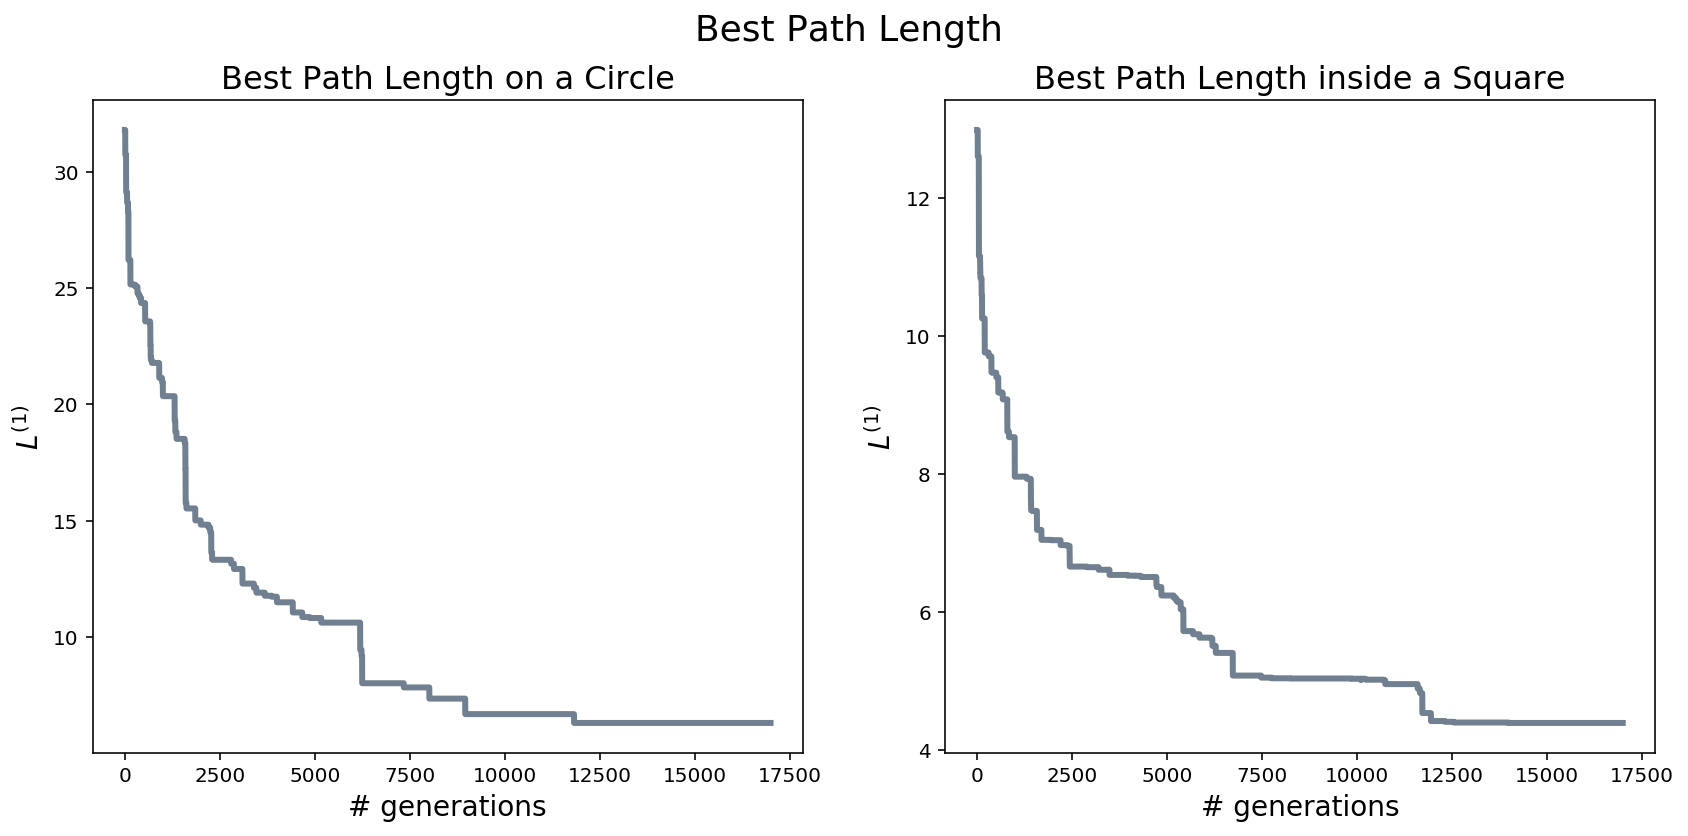

In [8]:
fig, axs= plt.subplots(1,2, figsize=(14,6))

plt.suptitle("Best Path Length", fontsize=18)

best1 = np.loadtxt("Results/Circle_BestPath.out", unpack=True)
best2 = np.loadtxt("Results/Square_BestPath.out", unpack=True)
gen = np.arange(len(best1))

axs[0].set_title("Best Path Length on a Circle", fontsize=16)
axs[0].plot(gen, best1, color='slategrey', linewidth=3)


axs[1].set_title("Best Path Length inside a Square", fontsize=16)
axs[1].plot(gen, best2, color='slategrey', linewidth=3)


for gino in axs.flat:
    gino.set_xlabel("# generations", fontsize=14)
    gino.set_ylabel("$L^{(1)}$", fontsize=14)
    
print("#### Best Path Length ####")
print("#    Circle:", best1[-1], "    #")
print("#    Square:", best2[-1], "    #")
print("##########################")


plt.show()

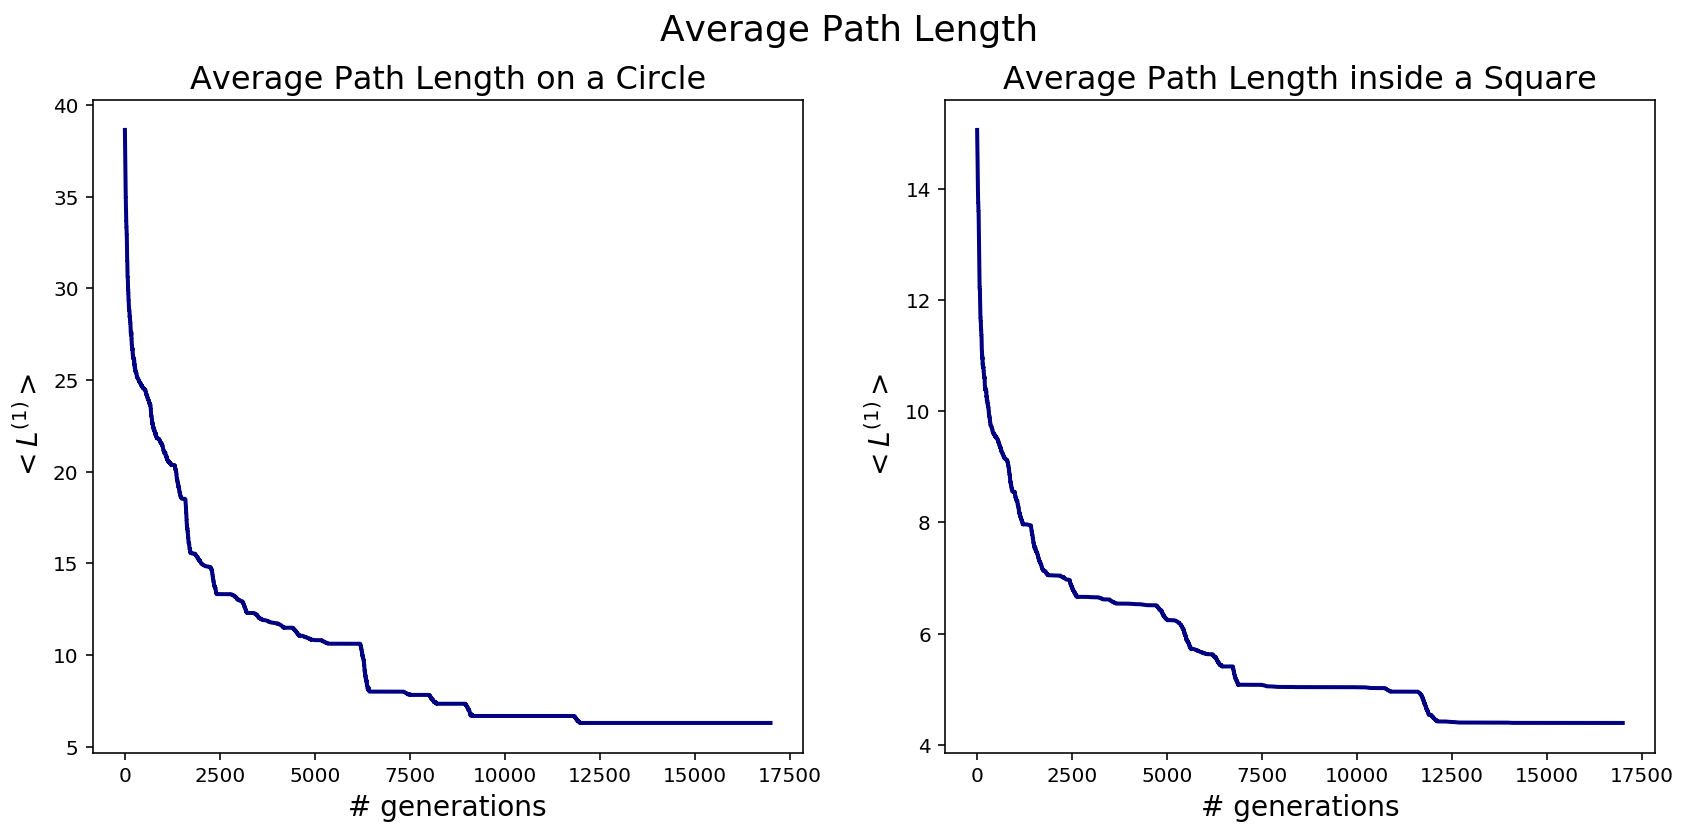

In [4]:
fig, axs= plt.subplots(1,2, figsize=(14,6))

plt.suptitle("Average Path Length", fontsize=18)

ave1 = np.loadtxt("Results/Circle_AvePath.out", unpack=True)
ave2 = np.loadtxt("Results/Square_AvePath.out", unpack=True)
gen = np.arange(len(ave1))

axs[0].set_title("Average Path Length on a Circle", fontsize=16)
axs[0].plot(gen, ave1, color='navy', linewidth=2)


axs[1].set_title("Average Path Length inside a Square", fontsize=16)
axs[1].plot(gen, ave2, color='navy', linewidth=2)


for gino in axs.flat:
    gino.set_xlabel("# generations", fontsize=14)
    gino.set_ylabel("$<L^{(1)}>$", fontsize=14)


plt.show()

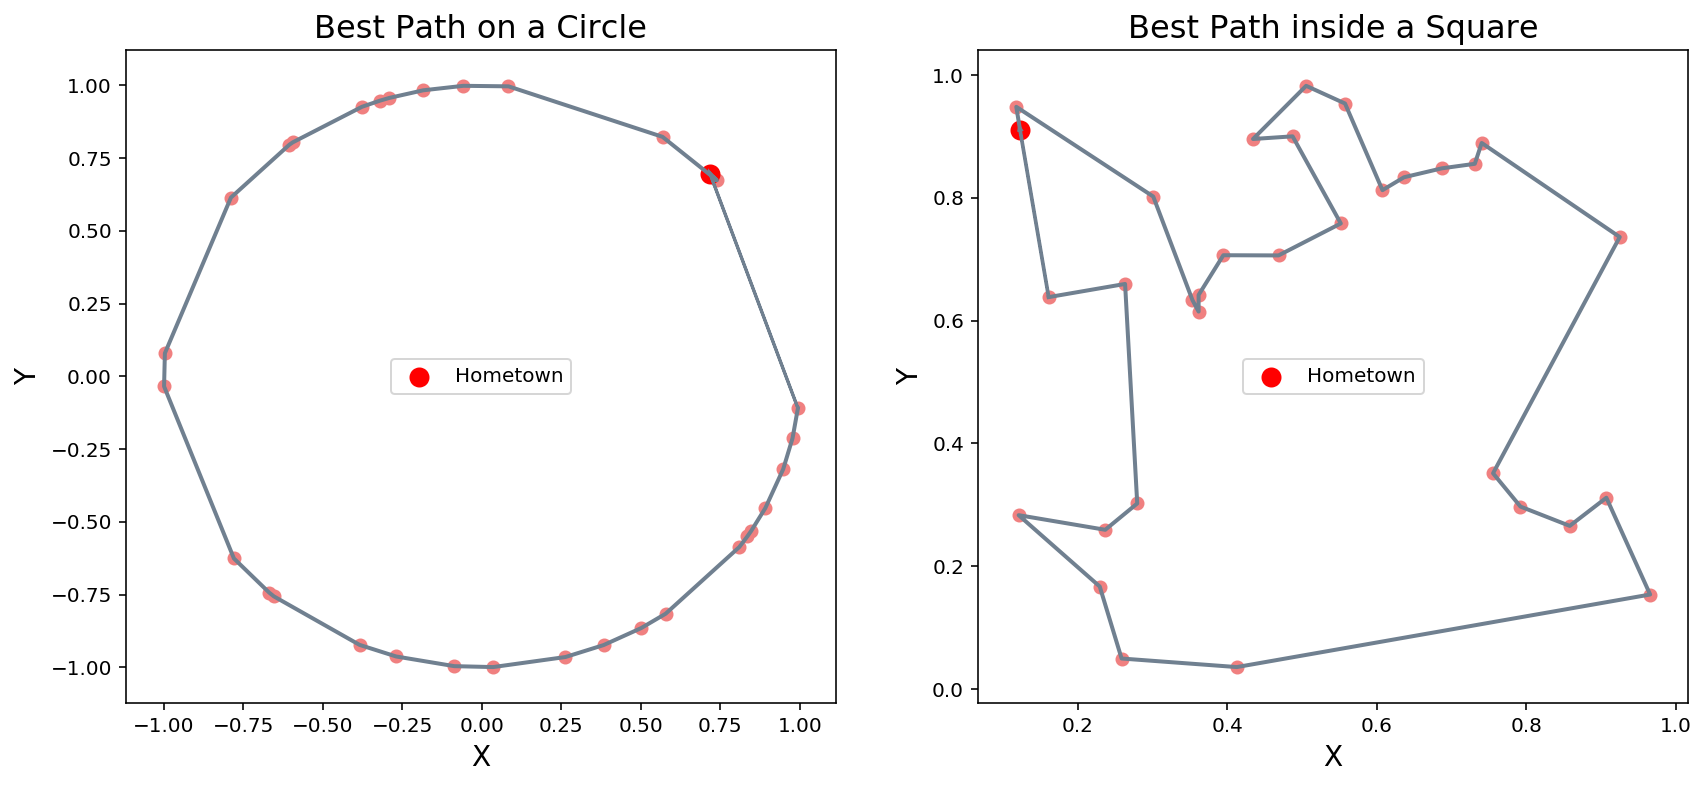

In [7]:
fig, axs= plt.subplots(1,2, figsize=(14,6))

x1,y1 = np.loadtxt("Results/Circle_Map.out", usecols=(0,1),unpack=True)
x2,y2 = np.loadtxt("Results/Square_Map.out", usecols=(0,1),unpack=True)

axs[0].set_title("Best Path on a Circle", fontsize=16)
axs[0].plot(x1,y1, color='slategrey', linewidth=2)
axs[0].scatter(x1, y1, color='lightcoral')    
axs[0].scatter(x1[0], y1[0], color='red', marker='o', linewidths=4, label="Hometown")
axs[0].arrow(x1[31], y1[31], x1[0]-x1[31], y1[0]-y1[31], color='slategrey', linewidth=1.5)

axs[1].set_title("Best Path inside a Square", fontsize=16)
axs[1].plot(x2,y2, color='slategrey', linewidth=2)
axs[1].scatter(x2, y2, color='lightcoral')    
axs[1].scatter(x2[0], y2[0], color='red', marker='o', linewidths=4, label="Hometown")
axs[1].arrow(x2[31], y2[31], x2[0]-x2[31], y2[0]-y2[31], color='slategrey', linewidth=1.5)

for gino in axs.flat:
    gino.set_xlabel("X", fontsize=14)
    gino.set_ylabel("Y", fontsize=14)
    gino.legend(fontsize="medium", loc='center')

plt.show()